In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [16]:
df = pd.read_csv('datasets/anxiety_attack_dataset.csv')

In [17]:
df.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


In [18]:
df.tail()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
11995,11996,28,Male,Engineer,4.4,4.1,360,1,Yes,Yes,1,139,20,2,Yes,No,7,No,9,6
11996,11997,49,Female,Doctor,9.9,2.2,433,4,No,Yes,4,150,33,2,No,No,3,No,5,6
11997,11998,23,Female,Student,9.8,8.1,140,19,Yes,No,2,81,33,2,No,No,8,No,1,10
11998,11999,52,Male,Teacher,5.9,6.6,114,12,No,No,9,90,14,5,No,No,3,No,9,5
11999,12000,50,Male,Teacher,6.6,7.8,114,0,No,No,7,107,19,2,No,Yes,3,No,8,2


In [19]:
df.shape

(12000, 20)

In [20]:
df.columns

Index(['ID', 'Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)',
       'Heart Rate (bpm during attack)', 'Breathing Rate (breaths/min)',
       'Sweating Level (1-5)', 'Dizziness', 'Medication',
       'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Severity of Anxiety Attack (1-10)'],
      dtype='object')

In [21]:
df.isnull().sum()

ID                                   0
Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm during attack)       0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Severity of Anxiety Attack (1-10)    0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

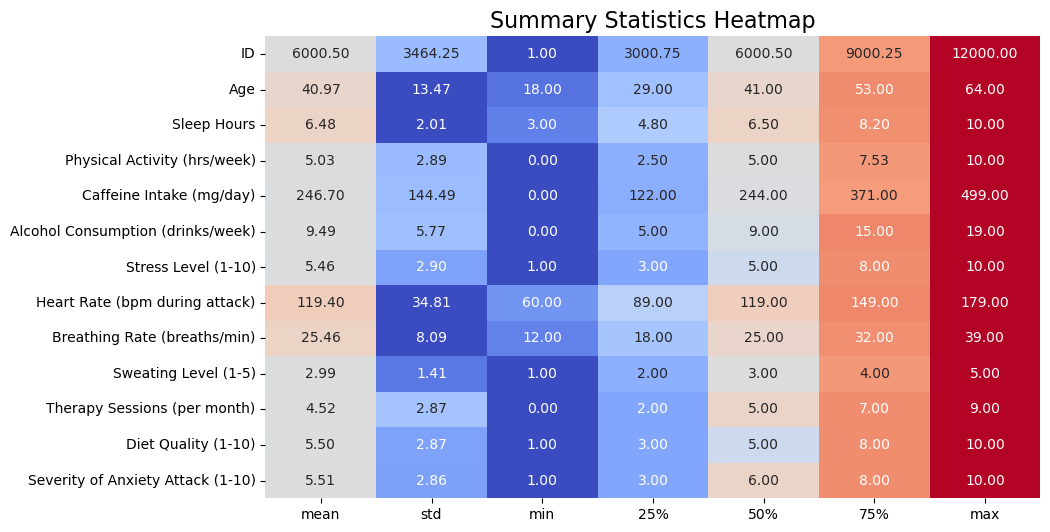

In [23]:
desc = df.describe().T
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(desc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].T).T
normalized_df = pd.DataFrame(normalized_data, columns=['mean', 'std', 'min', '25%', '50%', '75%', 'max'], index=desc.index)

plt.figure(figsize=(10, 6))
sns.heatmap(normalized_df, annot=desc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']], fmt='.2f', cmap='coolwarm', cbar=False)
plt.title('Summary Statistics Heatmap', fontsize=16)
plt.show()

In [24]:
colors = ['#99e2b4', '#88d4ab', '#78c6a3', '#67b99a', '#56ab91', '#469d89', '#358f80', '#248277', '#14746f', '#036666']
sns.set_palette(sns.color_palette(colors))

In [25]:
df.rename(columns={'Stress Level (1-10)': 'Stress', 'Severity of Anxiety Attack (1-10)': 'Anxiety Attack'}, inplace=True)

## Relationship Between Occupation and Stress Levels

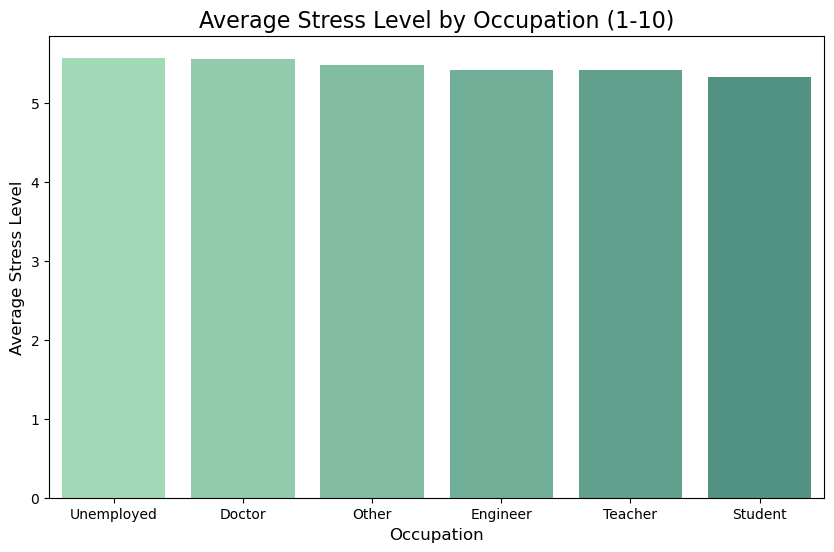

In [26]:
occupation_stress = df.groupby('Occupation')['Stress'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=occupation_stress, x='Occupation', y='Stress', hue='Occupation', palette=colors[:6])
plt.title('Average Stress Level by Occupation (1-10)', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Average Stress Level', fontsize=10)
plt.show()

## Relationship Between Occupation and Severity of Anxiety Attack

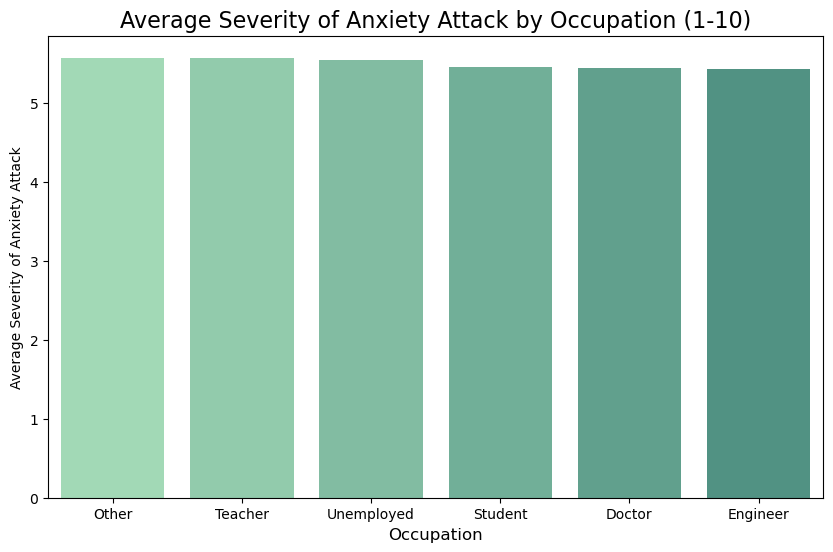

In [36]:
occupation_anxiety = df.groupby('Occupation')['Anxiety Attack'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=occupation_anxiety, x='Occupation', y='Anxiety Attack', hue='Occupation', palette=colors[:6])
plt.title('Average Severity of Anxiety Attack by Occupation (1-10)', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Average Severity of Anxiety Attack', fontsize=10)
plt.show()

## Relationship between Sleep Duration and Stress Levels

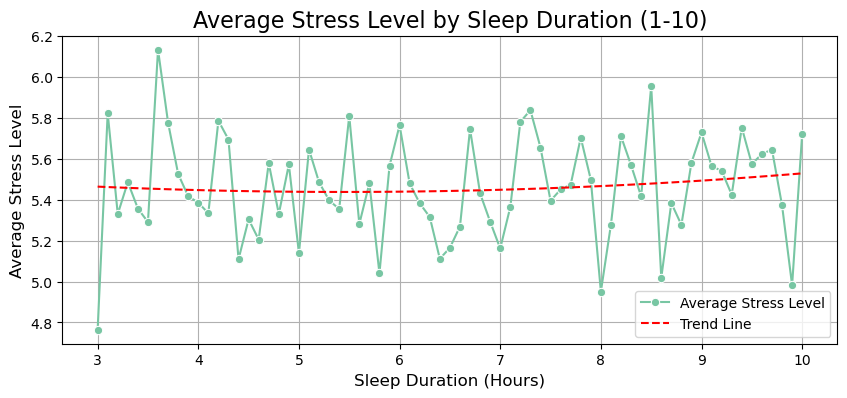

In [31]:
sleep_relationship = df.groupby('Sleep Hours')[['Stress', 'Anxiety Attack']].mean().reset_index()

x_stress = sleep_relationship['Sleep Hours']
y_stress = sleep_relationship['Stress']

trend_stress = np.poly1d(np.polyfit(x_stress, y_stress, 2))

plt.figure(figsize=(10, 4))
sns.lineplot(data=sleep_relationship, x='Sleep Hours', y='Stress', label='Average Stress Level', marker='o', color=colors[2])
plt.plot(x_stress, trend_stress(x_stress), label='Trend Line', linestyle='--', color='red')
plt.title('Average Stress Level by Sleep Duration (1-10)', fontsize=16)
plt.xlabel('Sleep Duration (Hours)', fontsize=12)
plt.ylabel('Average Stress Level', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## Relationship between Sleep Duration and Severity of Anxiety Attack

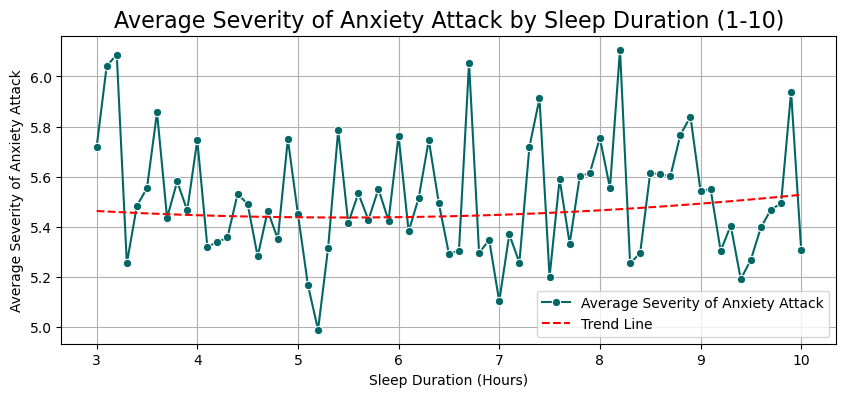

In [32]:
x_anxiety = sleep_relationship['Sleep Hours']
y_anxiety = sleep_relationship['Anxiety Attack']

trend_anxiety = np.poly1d(np.polyfit(x_anxiety, y_anxiety, 2))

plt.figure(figsize=(10, 4))
sns.lineplot(data=sleep_relationship, x='Sleep Hours', y='Anxiety Attack', label='Average Severity of Anxiety Attack', marker='o', color=colors[9])
plt.plot(x_stress, trend_stress(x_stress), label='Trend Line', linestyle='--', color='red')
plt.title('Average Severity of Anxiety Attack by Sleep Duration (1-10)', fontsize=16)
plt.xlabel('Sleep Duration (Hours)', fontsize=10)
plt.ylabel('Average Severity of Anxiety Attack', fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

# Demographic Analysis

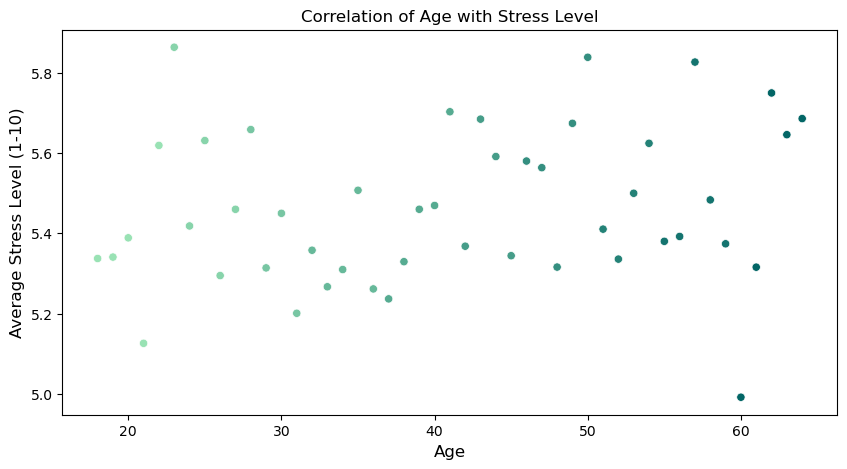

In [ ]:
age_stress = df.groupby('Age')['Stress'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
age_stress['Age_Bins'] = pd.cut(age_stress['Age'], bins=10, labels=False)
sns.scatterplot(data=age_stress, x='Age', y='Stress', hue='Age_Bins', palette=colors, legend=False)
plt.title('Correlation of Age with Stress Level')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Stress Level (1-10)', fontsize=12)
plt.show()

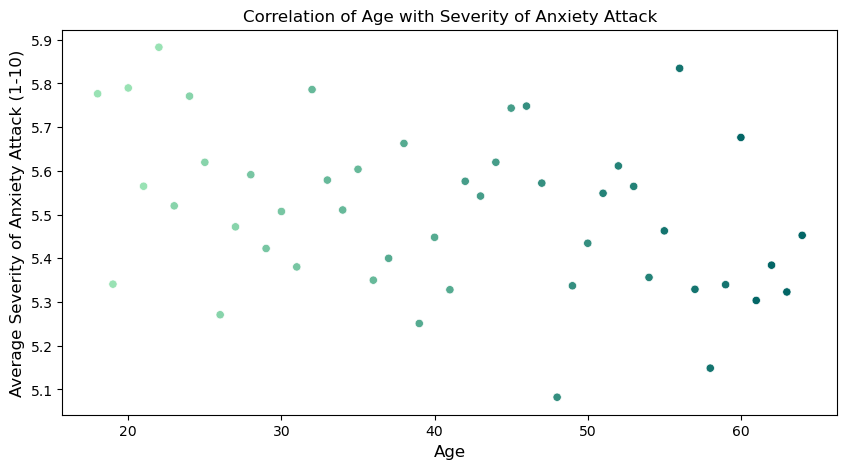

In [37]:
age_anxiety = df.groupby('Age')['Anxiety Attack'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
age_anxiety['Anxiety_Bins'] = pd.cut(age_anxiety['Age'], bins=10, labels=False)
sns.scatterplot(data=age_anxiety, x='Age', y='Anxiety Attack', hue='Anxiety_Bins', palette=colors, legend=False)
plt.title('Correlation of Age with Severity of Anxiety Attack')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Severity of Anxiety Attack (1-10)', fontsize=12)
plt.show()